In [1]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
#machine learning for sklearn
from sklearn.tree import DecisionTreeRegressor
#convert  string to numaric
from sklearn.preprocessing import OrdinalEncoder
#cross validation
from sklearn.model_selection import train_test_split
#replace null value for value
from sklearn.impute import SimpleImputer
#check refration - mean absulate errorreal y and predicting y have diffrence thats check)
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
#chech predic accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#save model
import joblib
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DATA UNDERSTANDING

In [2]:
# Load the datasets
doriginal_df = pd.read_csv('/content/Most_Streamed_Spotify_Songs_2024.csv', encoding='ISO-8859-1')




In [3]:
doriginal_df.head(5)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Unnamed: 29
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684.0,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,67.0,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1.0,NaN
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,136.0,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0.0,NaN
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,264.0,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0.0,NaN
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,82.0,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1.0,NaN


In [4]:
doriginal_df.shape

(4600, 30)

In [5]:
# Reduce the number of rows to 1000
df = doriginal_df.sample(n=1000, random_state=42)

# Check the shape of the new sampled DataFrame
print(df.shape)


(1000, 30)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 3683 to 3757
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       1000 non-null   object 
 1   Album Name                  1000 non-null   object 
 2   Artist                      1000 non-null   object 
 3   Release Date                1000 non-null   object 
 4   ISRC                        1000 non-null   object 
 5   All Time Rank               1000 non-null   object 
 6   Track Score                 1000 non-null   float64
 7   Spotify Streams             980 non-null    object 
 8   Spotify Playlist Count      991 non-null    object 
 9   Spotify Playlist Reach      991 non-null    object 
 10  Spotify Popularity          819 non-null    float64
 11  YouTube Views               934 non-null    object 
 12  YouTube Likes               931 non-null    object 
 13  TikTok Posts                753 non

In [7]:
df.dtypes

,0
Track,object
Album Name,object
Artist,object
Release Date,object
ISRC,object
All Time Rank,object
Track Score,float64
Spotify Streams,object
Spotify Playlist Count,object
Spotify Playlist Reach,object


In [8]:
df.shape

(1000, 30)

In [9]:
df.shape

(1000, 30)

In [10]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track', 'Unnamed: 29'],
      dtype='object')

In [11]:
df.describe()

,Track Score,Spotify Popularity,Deezer Playlist Count,Explicit Track,Unnamed: 29
count,1000.000000,819.000000,806.000000,1000.000000,0.0
mean,43.177700,63.039072,31.924318,0.370000,NaN
std,37.136269,17.321381,49.203827,0.483046,NaN
min,19.400000,1.000000,1.000000,0.000000,NaN
25%,23.500000,60.000000,6.000000,0.000000,NaN
50%,30.050000,67.000000,17.000000,0.000000,NaN
75%,46.900000,73.000000,37.000000,1.000000,NaN
max,355.700000,92.000000,502.000000,1.000000,NaN


In [12]:
# check for null data columns
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,20
Spotify Playlist Count,9
Spotify Playlist Reach,9


In [13]:
#Remove  Columns , column is not import
df= df.drop(columns=['TIDAL Popularity','ISRC'])


In [14]:
df.head(1)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Unnamed: 29
3683,Aynen,Hermano,Heijan,4/28/2023,"3,663",22.4,"66,701,855","12,381","2,302,824",57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"241,463",0.0,NaN


###Standardize column names

In [15]:
# Standardize column names
df.columns = df.columns.str.strip()                 # Remove leading/trailing whitespace
df.columns = df.columns.str.lower()                # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')     # Replace spaces with underscores
df.columns = df.columns.str.replace(r'[^\w\s]', '') # Remove special characters (except underscores)


# Display standardized column names
print("Standardized column names:", df.columns)

# Display the DataFrame
print(df)

Standardized column names: Index(['track', 'album_name', 'artist', 'release_date', 'all_time_rank',
       'track_score', 'spotify_streams', 'spotify_playlist_count',
       'spotify_playlist_reach', 'spotify_popularity', 'youtube_views',
       'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views',
       'youtube_playlist_reach', 'apple_music_playlist_count', 'airplay_spins',
       'siriusxm_spins', 'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track', 'unnamed:_29'],
      dtype='object')
                                         track  \
3683                                     Aynen   
4411                                 Pistoleta   
2584                Words (feat. Zara Larsson)   
69                                       Babba   
1844                                  Diamonds   
...                                        ...   
2550 

In [16]:
#recheck null value
df.isnull().sum()

,0
track,0
album_name,0
artist,0
release_date,0
all_time_rank,0
track_score,0
spotify_streams,20
spotify_playlist_count,9
spotify_playlist_reach,9
spotify_popularity,181


### Handle Missing Values

In [17]:
#Mode is a common method to fill missing values in categorical data
# Fill missing values with mode
df['artist'] = df['artist'].fillna('Unknown')

# Convert categorical data to numeric
le = LabelEncoder()
df['artist'] = le.fit_transform(df['artist'])

print(df)

                                         track  \
3683                                     Aynen   
4411                                 Pistoleta   
2584                Words (feat. Zara Larsson)   
69                                       Babba   
1844                                  Diamonds   
...                                        ...   
2550                            Kalkatiya Raja   
4025                                     Spell   
1572  Put It On Da Floor Again (feat. Cardi B)   
3105                      Collide (feat. Tyga)   
3757                                 Landmines   

                                             album_name  artist release_date  \
3683                                            Hermano     238    4/28/2023   
4411                                          Pistoleta     459    4/11/2024   
2584                         Words (feat. Zara Larsson)      19    4/22/2022   
69                      Black Book ID's: Chapter 5 - EP     226     3/3/2023   

In [18]:
df.shape

(1000, 28)

In [19]:
df.head(2)

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track,unnamed:_29
3683,Aynen,Hermano,238,4/28/2023,"3,663",22.4,"66,701,855","12,381","2,302,824",57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"241,463",0.0,NaN
4411,Pistoleta,Pistoleta,459,4/11/2024,"4,397",20.0,"24,652,626","3,598","10,031,289",59.0,...,NaN,9.0,"9,120,968",22,NaN,NaN,NaN,"106,947",1.0,NaN


In [20]:
df.columns

Index(['track', 'album_name', 'artist', 'release_date', 'all_time_rank',
       'track_score', 'spotify_streams', 'spotify_playlist_count',
       'spotify_playlist_reach', 'spotify_popularity', 'youtube_views',
       'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views',
       'youtube_playlist_reach', 'apple_music_playlist_count', 'airplay_spins',
       'siriusxm_spins', 'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track', 'unnamed:_29'],
      dtype='object')

### List of numerical columns to handle missing values

In [21]:
# List of numerical columns to handle missing values
num_cols = [
    'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach',
    'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
    'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
    'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
    'deezer_playlist_count', 'deezer_playlist_reach', 'amazon_playlist_count',
    'pandora_streams', 'pandora_track_stations', 'soundcloud_streams',
    'shazam_counts', 'explicit_track',
]

# Convert columns to numeric
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())  # Fill missing values with column mean

print(df)

                                         track  \
3683                                     Aynen   
4411                                 Pistoleta   
2584                Words (feat. Zara Larsson)   
69                                       Babba   
1844                                  Diamonds   
...                                        ...   
2550                            Kalkatiya Raja   
4025                                     Spell   
1572  Put It On Da Floor Again (feat. Cardi B)   
3105                      Collide (feat. Tyga)   
3757                                 Landmines   

                                             album_name  artist release_date  \
3683                                            Hermano     238    4/28/2023   
4411                                          Pistoleta     459    4/11/2024   
2584                         Words (feat. Zara Larsson)      19    4/22/2022   
69                      Black Book ID's: Chapter 5 - EP     226     3/3/2023   

In [22]:
#recheck null value
df.isnull().sum()

,0
track,0
album_name,0
artist,0
release_date,0
all_time_rank,0
track_score,0
spotify_streams,1000
spotify_playlist_count,0
spotify_playlist_reach,0
spotify_popularity,0


In [23]:
#drop spotify_streams column it is have many missing value
df = df.drop(columns=['spotify_streams','soundcloud_streams','youtube_views'])

In [24]:
df.isnull().sum()

,0
track,0
album_name,0
artist,0
release_date,0
all_time_rank,0
track_score,0
spotify_playlist_count,0
spotify_playlist_reach,0
spotify_popularity,0
youtube_likes,0


#  BASIC SUMMERIZATION SATISTICS





## For Numerical Data

In [25]:
# Create copy of the original DataFrame
Original_data = df.copy()

In [26]:
summary_stats = df.describe()
print(summary_stats)


           artist  track_score  spotify_playlist_count  \
count  1000.00000  1000.000000             1000.000000   
mean    327.02000    43.177700              206.576000   
std     192.13183    37.136269               93.336672   
min       0.00000    19.400000                1.000000   
25%     159.75000    23.500000              206.576000   
50%     322.00000    30.050000              206.576000   
75%     493.25000    46.900000              206.576000   
max     670.00000   355.700000              955.000000   

       spotify_playlist_reach  spotify_popularity  youtube_likes  \
count             1000.000000         1000.000000    1000.000000   
mean               204.702703           63.039072     579.500000   
std                 46.423171           15.673877      21.293154   
min                  1.000000            1.000000     174.000000   
25%                204.702703           62.000000     579.500000   
50%                204.702703           65.000000     579.500000   
7

In [27]:
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_summary)


                            Missing Values  Percentage
track                                    0         0.0
album_name                               0         0.0
artist                                   0         0.0
release_date                             0         0.0
all_time_rank                            0         0.0
track_score                              0         0.0
spotify_playlist_count                   0         0.0
spotify_playlist_reach                   0         0.0
spotify_popularity                       0         0.0
youtube_likes                            0         0.0
tiktok_posts                             0         0.0
tiktok_likes                             0         0.0
tiktok_views                             0         0.0
youtube_playlist_reach                   0         0.0
apple_music_playlist_count               0         0.0
airplay_spins                            0         0.0
siriusxm_spins                           0         0.0
deezer_pla

In [28]:
df.columns

Index(['track', 'album_name', 'artist', 'release_date', 'all_time_rank',
       'track_score', 'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_likes', 'tiktok_posts', 'tiktok_likes',
       'tiktok_views', 'youtube_playlist_reach', 'apple_music_playlist_count',
       'airplay_spins', 'siriusxm_spins', 'deezer_playlist_count',
       'deezer_playlist_reach', 'amazon_playlist_count', 'pandora_streams',
       'pandora_track_stations', 'shazam_counts', 'explicit_track',
       'unnamed:_29'],
      dtype='object')

In [29]:
df.head(1)

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_likes,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track,unnamed:_29
3683,Aynen,Hermano,238,4/28/2023,"3,663",22.4,206.576,204.702703,57.0,579.5,...,216.144828,170.013944,31.924318,376.068966,25.240458,283.833333,324.664804,235.933333,0.0,NaN


### track column encode to track_encoded column name using lable encode

## convert categorical data into numerical data using olable-encorder

In [30]:
 #Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'track' column
df['track_encoded'] = label_encoder.fit_transform(df['track'])

# Display the DataFrame to verify changes
print("DataFrame after label encoding:")
print(df)

DataFrame after label encoding:
                                         track  \
3683                                     Aynen   
4411                                 Pistoleta   
2584                Words (feat. Zara Larsson)   
69                                       Babba   
1844                                  Diamonds   
...                                        ...   
2550                            Kalkatiya Raja   
4025                                     Spell   
1572  Put It On Da Floor Again (feat. Cardi B)   
3105                      Collide (feat. Tyga)   
3757                                 Landmines   

                                             album_name  artist release_date  \
3683                                            Hermano     238    4/28/2023   
4411                                          Pistoleta     459    4/11/2024   
2584                         Words (feat. Zara Larsson)      19    4/22/2022   
69                      Black Book ID's: Chapte

In [31]:
df.head(5)

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_likes,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track,unnamed:_29,track_encoded
3683,Aynen,Hermano,238,4/28/2023,"3,663",22.4,206.576,204.702703,57.0,579.5,...,170.013944,31.924318,376.068966,25.240458,283.833333,324.664804,235.933333,0.0,NaN,69
4411,Pistoleta,Pistoleta,459,4/11/2024,"4,397",20.0,206.576,204.702703,59.0,579.5,...,170.013944,9.000000,376.068966,22.000000,283.833333,324.664804,235.933333,1.0,NaN,631
2584,Words (feat. Zara Larsson),Words (feat. Zara Larsson),19,4/22/2022,"2,563",27.9,206.576,204.702703,72.0,579.5,...,409.000000,31.000000,376.068966,41.000000,283.833333,886.000000,235.933333,0.0,NaN,919
69,Babba,Black Book ID's: Chapter 5 - EP,226,3/3/2023,70,176.2,252.000,204.702703,6.0,579.5,...,170.013944,31.924318,376.068966,25.240458,283.833333,324.664804,903.000000,0.0,NaN,83
1844,Diamonds,Diamonds,532,9/17/2020,"1,835",33.9,206.576,204.702703,58.0,579.5,...,53.000000,158.000000,376.068966,35.000000,283.833333,324.664804,235.933333,0.0,NaN,209


### album_name_encode column encode to album_name column name using lable encode

In [32]:
 #Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'track' column
df['album_name_encoded'] = label_encoder.fit_transform(df['album_name'])

# Display the DataFrame to verify changes
print("DataFrame after label encoding:")
print(df)

DataFrame after label encoding:
                                         track  \
3683                                     Aynen   
4411                                 Pistoleta   
2584                Words (feat. Zara Larsson)   
69                                       Babba   
1844                                  Diamonds   
...                                        ...   
2550                            Kalkatiya Raja   
4025                                     Spell   
1572  Put It On Da Floor Again (feat. Cardi B)   
3105                      Collide (feat. Tyga)   
3757                                 Landmines   

                                             album_name  artist release_date  \
3683                                            Hermano     238    4/28/2023   
4411                                          Pistoleta     459    4/11/2024   
2584                         Words (feat. Zara Larsson)      19    4/22/2022   
69                      Black Book ID's: Chapte

In [33]:
df.head(1)

,track,album_name,artist,release_date,all_time_rank,track_score,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_likes,...,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track,unnamed:_29,track_encoded,album_name_encoded
3683,Aynen,Hermano,238,4/28/2023,"3,663",22.4,206.576,204.702703,57.0,579.5,...,31.924318,376.068966,25.240458,283.833333,324.664804,235.933333,0.0,NaN,69,342


In [34]:
#drop track , album_name	 column it is have many missing value
df = df.drop(columns=['track','album_name'])

In [35]:
df.head(1)

,artist,release_date,all_time_rank,track_score,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_likes,tiktok_posts,tiktok_likes,...,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track,unnamed:_29,track_encoded,album_name_encoded
3683,238,4/28/2023,"3,663",22.4,206.576,204.702703,57.0,579.5,308.975,249.0,...,31.924318,376.068966,25.240458,283.833333,324.664804,235.933333,0.0,NaN,69,342


## Visualize the data


                              artist  release_date  all_time_rank  \
artist                      1.000000           NaN       0.004924   
release_date                     NaN           NaN            NaN   
all_time_rank               0.004924           NaN       1.000000   
track_score                 0.000429           NaN      -0.774631   
spotify_playlist_count      0.042646           NaN      -0.081478   
spotify_playlist_reach      0.037298           NaN      -0.080217   
spotify_popularity          0.012232           NaN      -0.080188   
youtube_likes              -0.006095           NaN      -0.099763   
tiktok_posts               -0.027178           NaN       0.131992   
tiktok_likes                0.008505           NaN            NaN   
tiktok_views               -0.036268           NaN            NaN   
youtube_playlist_reach      0.061657           NaN      -0.023875   
apple_music_playlist_count -0.011960           NaN      -0.300399   
airplay_spins              -0.0157

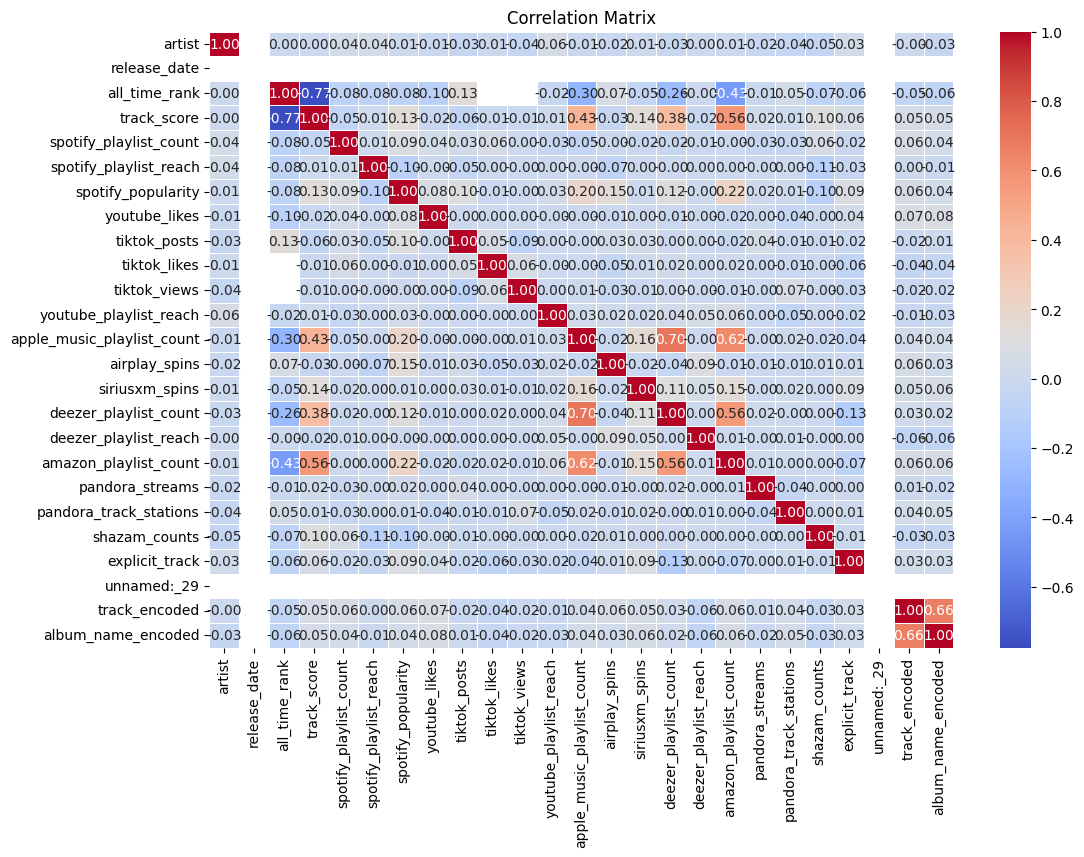

In [36]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, setting errors='coerce' will convert invalid parsing to NaN

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Data Mining

In [37]:
# calculating and visualizing correlation of each feature with the target value
#.corr function- check corerelstionship
#track_score- we pradict target variable
corr_matrix = df.corr()
corr_with_target = corr_matrix['track_score'].sort_values(ascending=False)
print(corr_with_target)

track_score                   1.000000
amazon_playlist_count         0.559981
apple_music_playlist_count    0.431507
deezer_playlist_count         0.378780
siriusxm_spins                0.135838
spotify_popularity            0.132898
shazam_counts                 0.103823
explicit_track                0.059928
album_name_encoded            0.053665
track_encoded                 0.051766
pandora_streams               0.023459
youtube_playlist_reach        0.012170
pandora_track_stations        0.011204
spotify_playlist_reach        0.010061
artist                        0.000429
tiktok_likes                 -0.006777
tiktok_views                 -0.011319
youtube_likes                -0.019050
deezer_playlist_reach        -0.021621
airplay_spins                -0.030562
spotify_playlist_count       -0.049170
tiktok_posts                 -0.060357
all_time_rank                -0.774631
release_date                       NaN
unnamed:_29                        NaN
Name: track_score, dtype:

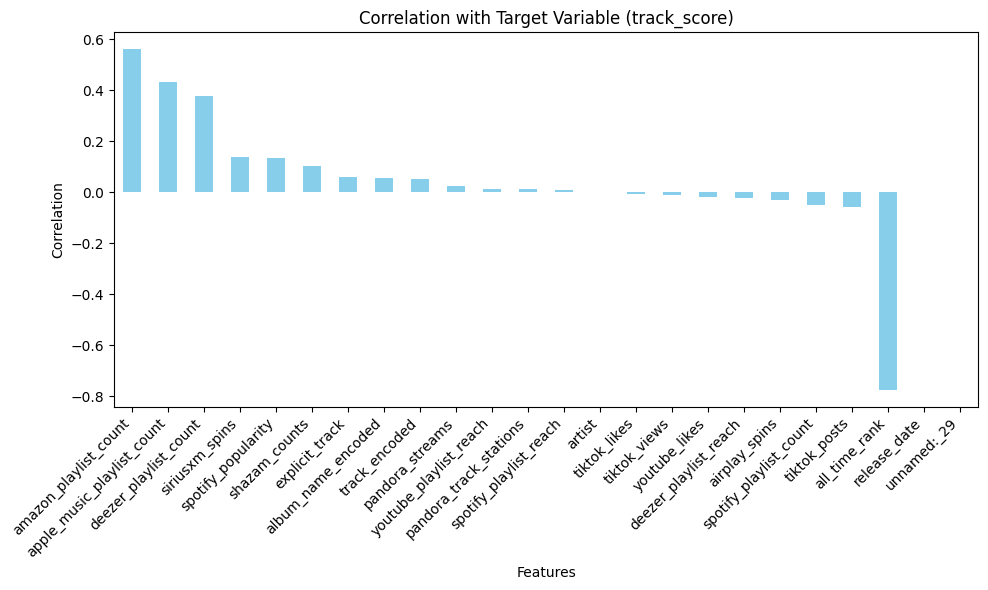

In [38]:
plt.figure(figsize=(10, 6))
corr_with_target.drop('track_score').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (track_score)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
df.head()

,artist,release_date,all_time_rank,track_score,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_likes,tiktok_posts,tiktok_likes,...,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track,unnamed:_29,track_encoded,album_name_encoded
3683,238,NaN,NaN,22.4,206.576,204.702703,57.0,579.5,308.975,249.0,...,31.924318,376.068966,25.240458,283.833333,324.664804,235.933333,0.0,NaN,69,342
4411,459,NaN,NaN,20.0,206.576,204.702703,59.0,579.5,308.975,249.0,...,9.000000,376.068966,22.000000,283.833333,324.664804,235.933333,1.0,NaN,631,602
2584,19,NaN,NaN,27.9,206.576,204.702703,72.0,579.5,308.975,249.0,...,31.000000,376.068966,41.000000,283.833333,886.000000,235.933333,0.0,NaN,919,880
69,226,NaN,70.0,176.2,252.000,204.702703,6.0,579.5,308.975,249.0,...,31.924318,376.068966,25.240458,283.833333,324.664804,903.000000,0.0,NaN,83,112
1844,532,NaN,NaN,33.9,206.576,204.702703,58.0,579.5,308.975,249.0,...,158.000000,376.068966,35.000000,283.833333,324.664804,235.933333,0.0,NaN,209,197


In [40]:

features = df.columns.drop(['all_time_rank','track_score']).tolist()


y = df['track_score']
X = df[features]

In [41]:
df['track_score'].unique()

array([ 22.4,  20. ,  27.9, 176.2,  33.9, 233.5,  25. ,  21.3,  19.8,
        19.5,  23. ,  22.3,  24.7,  39.8,  36.8,  30.1,  49.9, 100.1,
        47.9,  28.7,  24.6, 278.9, 266.3,  66.3,  19.9,  66.8,  19.6,
        36.6,  88.4,  97.3,  34.3,  32.3,  20.5,  22.6,  65.9,  90.1,
        35.6,  37.8,  28.8,  26. ,  32.5,  79.9, 107.4,  75.3,  24.9,
        35.7,  34.8,  47.1,  26.5,  42.7,  24.5,  21. ,  23.9,  24.8,
        27.4,  68.7,  30.2,  63.1,  58.8,  59.5,  23.3,  24.4,  26.3,
        58.6,  22.7,  19.7,  29.3,  21.1, 152.3,  43.7,  21.8,  20.8,
        23.1,  82. ,  20.3,  20.4,  27.7,  29.9,  30. ,  27.1, 355.7,
        36.1,  29.8,  44.5,  52.1,  40.5,  25.4,  27. ,  37.6,  29.2,
        59.1,  52.2,  29. ,  43.8, 129.4,  23.7,  60. , 112. ,  47.2,
        73.2,  56.3,  47.6,  26.4,  34.7,  49. ,  22. ,  32.6,  22.2,
        54. ,  56.7,  55.6,  20.7,  30.9, 100.3, 256. ,  34.2,  33.4,
       167.8,  43.4,  39.7,  46.8,  26.6,  37.7,  66.7,  53.4,  35.3,
        39.6,  27.2,

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(train_X)
# X_test_scaled = scaler.transform(val_X)
#get bell x

# Normalization
scaler = MinMaxScaler().set_output(transform="pandas")
X_normalized = scaler.fit_transform(X)

X_normalized.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Index(['artist', 'release_date', 'spotify_playlist_count',
       'spotify_playlist_reach', 'spotify_popularity', 'youtube_likes',
       'tiktok_posts', 'tiktok_likes', 'tiktok_views',
       'youtube_playlist_reach', 'apple_music_playlist_count', 'airplay_spins',
       'siriusxm_spins', 'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'shazam_counts', 'explicit_track', 'unnamed:_29', 'track_encoded',
       'album_name_encoded'],
      dtype='object')

In [43]:
train_X, val_X, train_y, val_y = train_test_split(X_normalized, y, random_state = 10 ,test_size=0.3)

In [44]:
print("Shape of X before handling NaN:", X.shape)
print("Shape of y:", y.shape)


Shape of X before handling NaN: (1000, 23)
Shape of y: (1000,)


In [45]:
print(df.isnull().sum())


artist                           0
release_date                  1000
all_time_rank                  765
track_score                      0
spotify_playlist_count           0
spotify_playlist_reach           0
spotify_popularity               0
youtube_likes                    0
tiktok_posts                     0
tiktok_likes                     0
tiktok_views                     0
youtube_playlist_reach           0
apple_music_playlist_count       0
airplay_spins                    0
siriusxm_spins                   0
deezer_playlist_count            0
deezer_playlist_reach            0
amazon_playlist_count            0
pandora_streams                  0
pandora_track_stations           0
shazam_counts                    0
explicit_track                   0
unnamed:_29                   1000
track_encoded                    0
album_name_encoded               0
dtype: int64


In [46]:
# Replace NaN values with 0
df.fillna(0, inplace=True)


# Check for any remaining NaN values (there should be none)
print(df.isnull().sum())


artist                        0
release_date                  0
all_time_rank                 0
track_score                   0
spotify_playlist_count        0
spotify_playlist_reach        0
spotify_popularity            0
youtube_likes                 0
tiktok_posts                  0
tiktok_likes                  0
tiktok_views                  0
youtube_playlist_reach        0
apple_music_playlist_count    0
airplay_spins                 0
siriusxm_spins                0
deezer_playlist_count         0
deezer_playlist_reach         0
amazon_playlist_count         0
pandora_streams               0
pandora_track_stations        0
shazam_counts                 0
explicit_track                0
unnamed:_29                   0
track_encoded                 0
album_name_encoded            0
dtype: int64


In [47]:
# Check data types of columns
print(df.dtypes)


artist                          int64
release_date                  float64
all_time_rank                 float64
track_score                   float64
spotify_playlist_count        float64
spotify_playlist_reach        float64
spotify_popularity            float64
youtube_likes                 float64
tiktok_posts                  float64
tiktok_likes                  float64
tiktok_views                  float64
youtube_playlist_reach        float64
apple_music_playlist_count    float64
airplay_spins                 float64
siriusxm_spins                float64
deezer_playlist_count         float64
deezer_playlist_reach         float64
amazon_playlist_count         float64
pandora_streams               float64
pandora_track_stations        float64
shazam_counts                 float64
explicit_track                float64
unnamed:_29                   float64
track_encoded                   int64
album_name_encoded              int64
dtype: object


### from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('new_dataframe.csv', index=False)

# Provide a link to download the file
files.download('new_dataframe.csv')

In [48]:
df.columns

Index(['artist', 'release_date', 'all_time_rank', 'track_score',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_likes', 'tiktok_posts', 'tiktok_likes',
       'tiktok_views', 'youtube_playlist_reach', 'apple_music_playlist_count',
       'airplay_spins', 'siriusxm_spins', 'deezer_playlist_count',
       'deezer_playlist_reach', 'amazon_playlist_count', 'pandora_streams',
       'pandora_track_stations', 'shazam_counts', 'explicit_track',
       'unnamed:_29', 'track_encoded', 'album_name_encoded'],
      dtype='object')

In [49]:
from sklearn.linear_model import LinearRegression

# Initialize the regressor
regressor = LinearRegression()


In [50]:
# Feature Selection
X = df.drop(columns=['track_score'])  # All features except the target
y = df['track_score']  #

In [51]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)

In [54]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [55]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [56]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
# Predict on the test set using the best parameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [58]:
# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [59]:
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-Squared: {r2_rf}')

Random Forest - Mean Squared Error: 42.72150422811697
Random Forest - R-Squared: 0.9537973062702426


## Random Forest model to see which features are most important in predicting

In [60]:
# Extract feature importance from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

In [61]:
# Create a DataFrame for better visualization
feature_names = X.columns  # Get the feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [62]:
# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

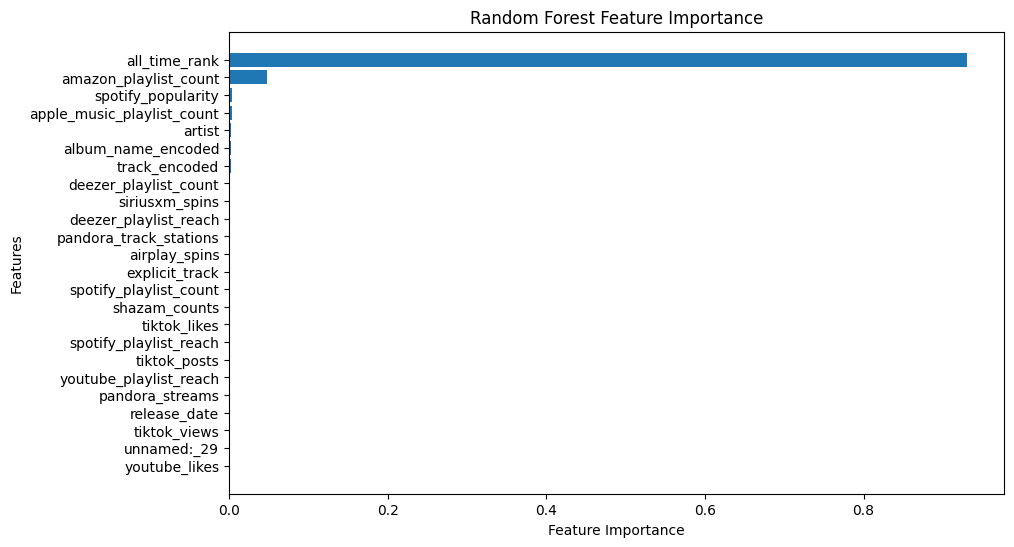

In [63]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visual ordering
plt.show()

In [64]:
X = pd.DataFrame(np.random.rand(100, 6), columns=['Track Score', 'Spotify Popularity', 'YouTube Views','TikTok Views','Apple Music Playlist Count','Pandora Streams'])
y = pd.Series(np.random.rand(100))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
y_pred = model.predict(X_test)

In [68]:
residuals = y_test - y_pred

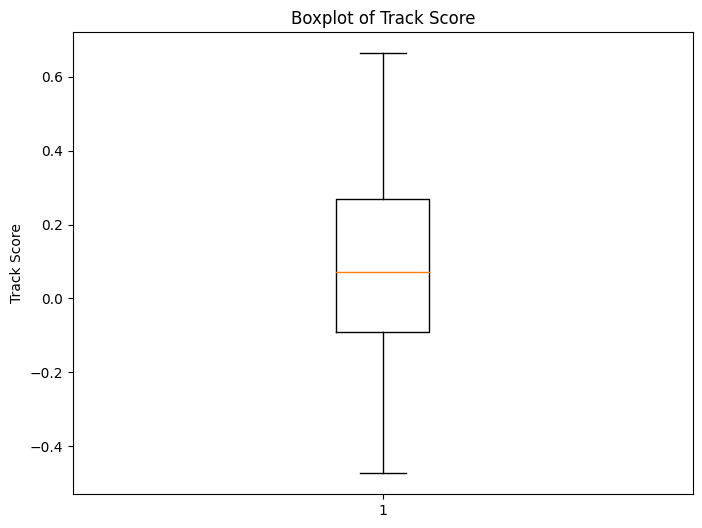

In [69]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals)
plt.title("Boxplot of Track Score")
plt.ylabel("Track Score")
plt.show()


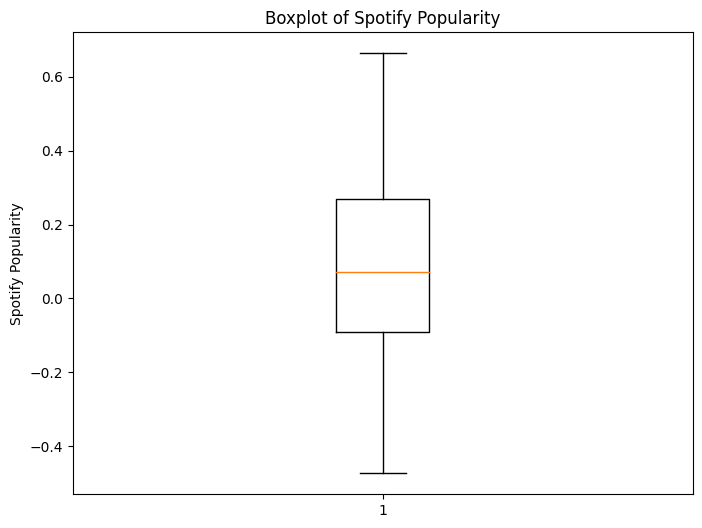

In [70]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals)
plt.title("Boxplot of Spotify Popularity")
plt.ylabel("Spotify Popularity")
plt.show()

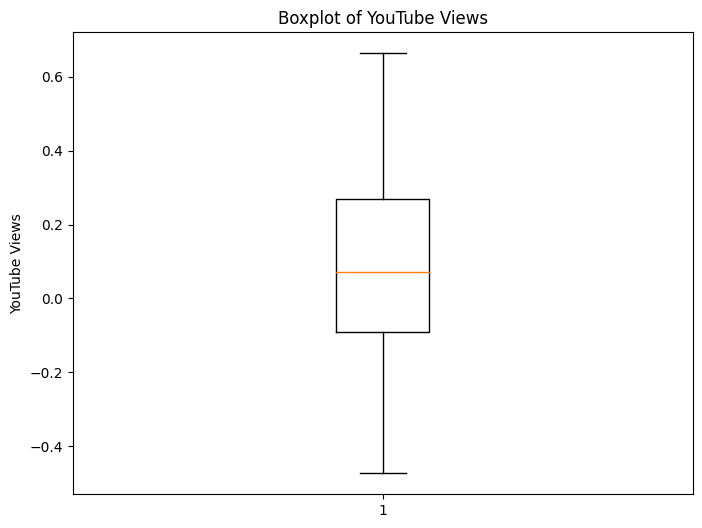

In [71]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals)
plt.title("Boxplot of YouTube Views")
plt.ylabel("YouTube Views")
plt.show()

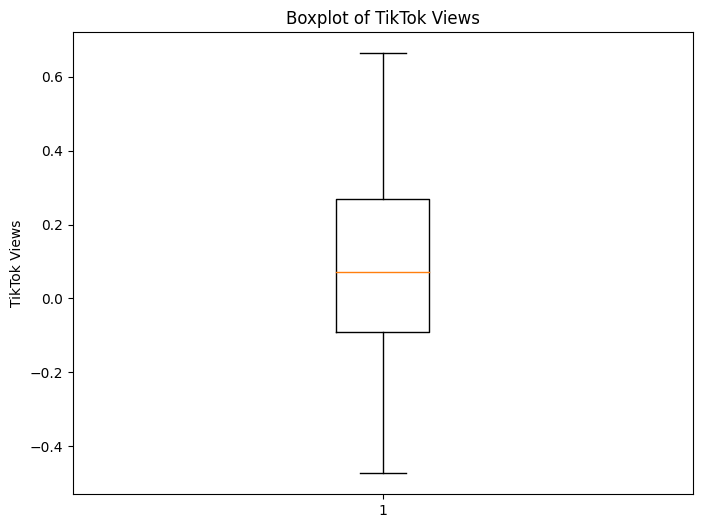

In [72]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals)
plt.title("Boxplot of TikTok Views")
plt.ylabel("TikTok Views")
plt.show()

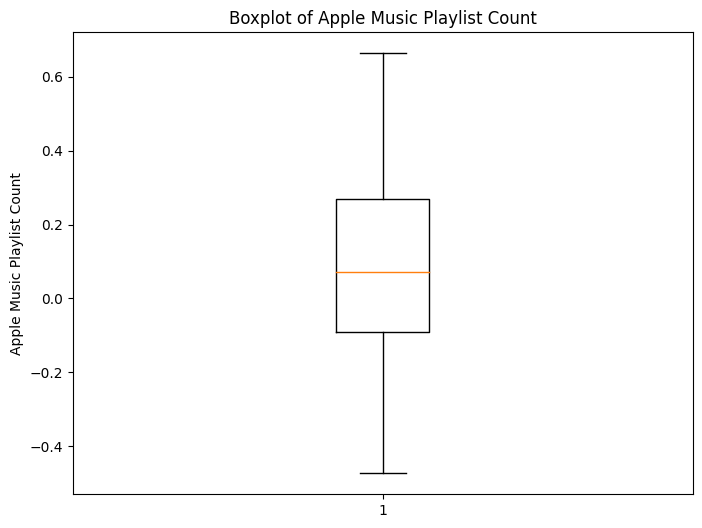

In [73]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals)
plt.title("Boxplot of Apple Music Playlist Count")
plt.ylabel("Apple Music Playlist Count")
plt.show()

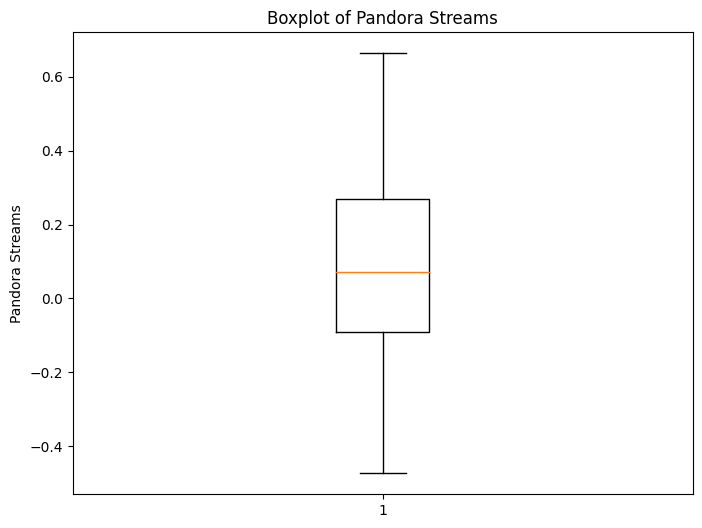

In [74]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals)
plt.title("Boxplot of Pandora Streams")
plt.ylabel("Pandora Streams")
plt.show()

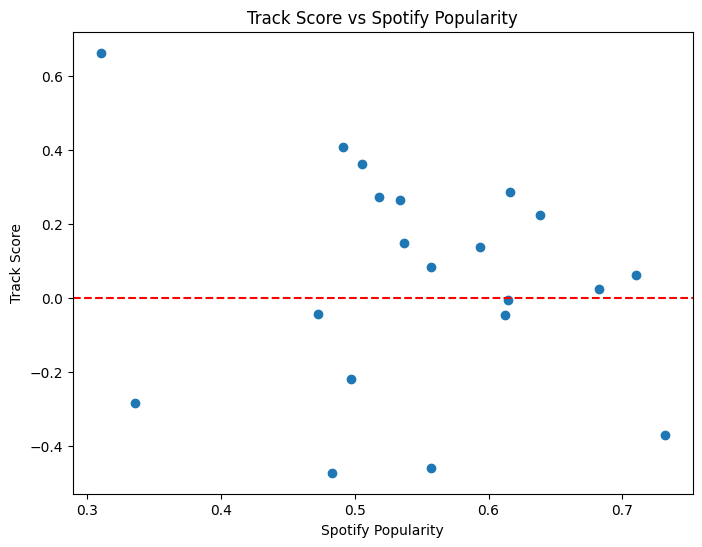

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Track Score vs Spotify Popularity")
plt.xlabel("Spotify Popularity")
plt.ylabel("Track Score")
plt.show()


In [90]:
doriginal_df['Spotify Streams'] = doriginal_df['Spotify Streams'].replace({',': ''}, regex=True).astype(float)

In [92]:
top_5_songs = doriginal_df[['Track', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(5)


In [93]:
labels = top_5_songs['Track']
sizes = top_5_songs['Spotify Streams']

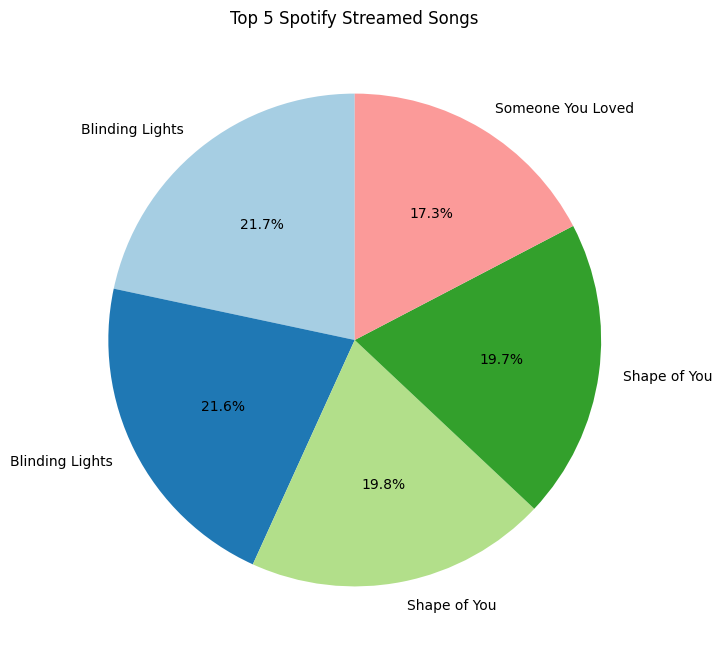

In [94]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Spotify Streamed Songs')
plt.show()

In [95]:

doriginal_df['YouTube Views'] = doriginal_df['YouTube Views'].replace({',': ''}, regex=True).astype(float)


In [96]:
top_5_songs = doriginal_df[['Track', 'YouTube Views']].sort_values(by='YouTube Views', ascending=False).head(5)


In [99]:
labels = top_5_songs['Track']
sizes = top_5_songs['YouTube Views']


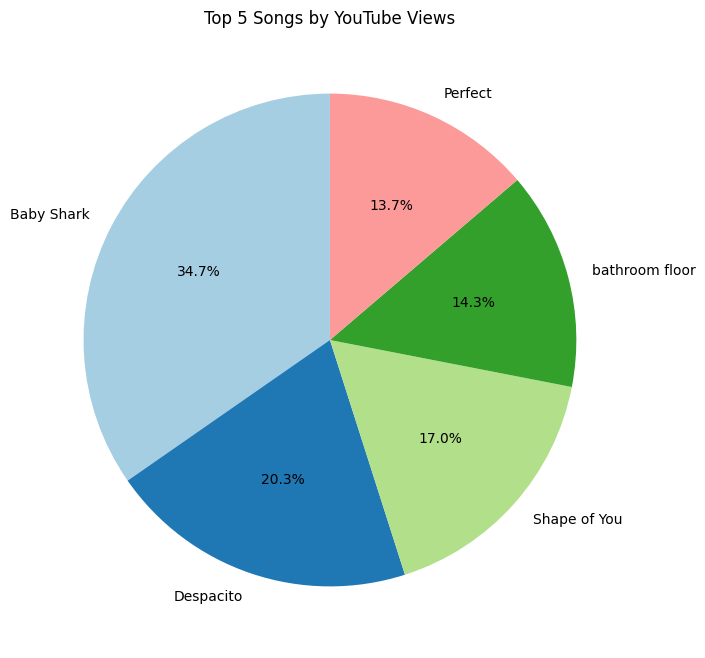

In [100]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Songs by YouTube Views')
plt.show()

In [101]:
doriginal_df['TikTok Posts'] = doriginal_df['TikTok Posts'].replace({',': ''}, regex=True).astype(float)


In [103]:
top_5_tiktok = doriginal_df[['Track', 'TikTok Posts']].sort_values(by='TikTok Posts', ascending=False).head(5)


In [104]:
labels = top_5_tiktok['Track']
sizes = top_5_tiktok['TikTok Posts']

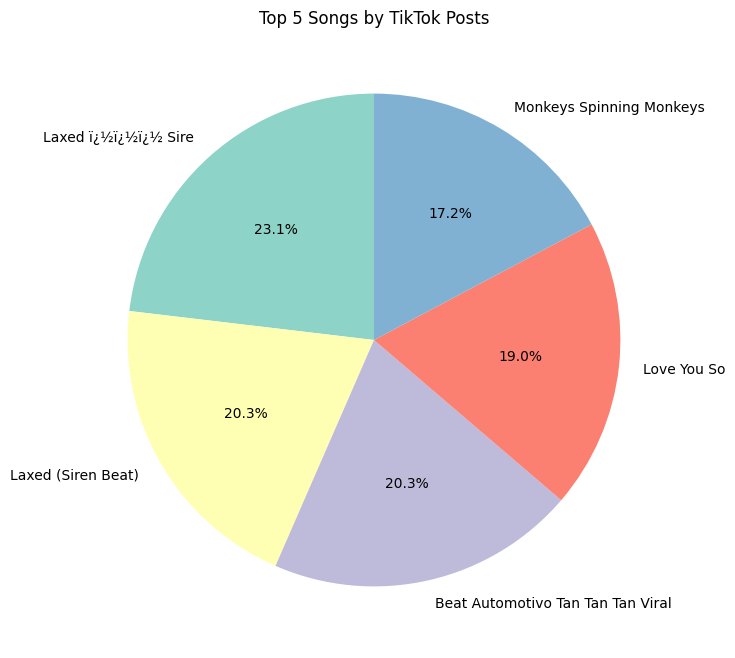

In [105]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Top 5 Songs by TikTok Posts')
plt.show()

In [106]:
doriginal_df['Shazam Counts'] = doriginal_df['Shazam Counts'].replace({',': ''}, regex=True).astype(float)


In [107]:
top_5_shazam = doriginal_df[['Track', 'Shazam Counts']].sort_values(by='Shazam Counts', ascending=False).head(5)


In [108]:
labels = top_5_shazam['Track']
sizes = top_5_shazam['Shazam Counts']

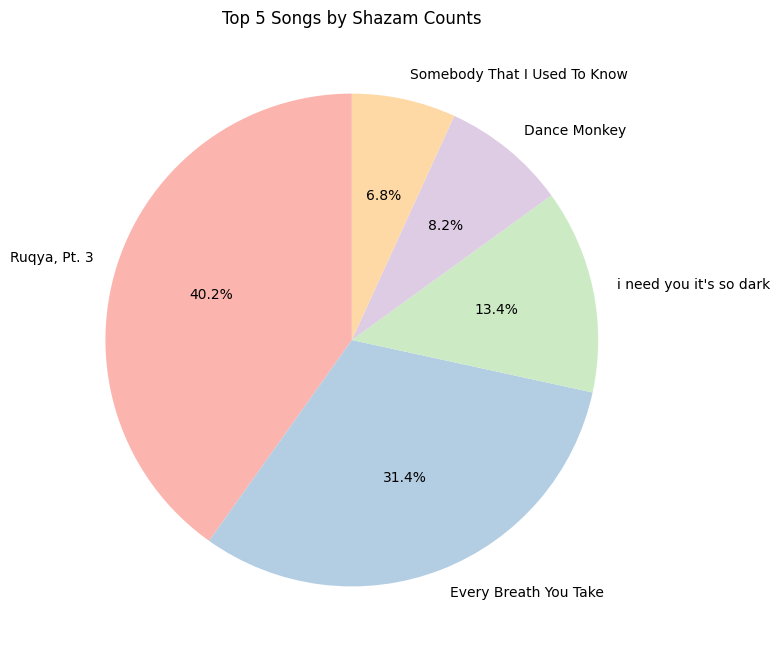

In [109]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Songs by Shazam Counts')
plt.show()

### cross-validation to further evaluate the model's performance

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
# Perform 5-fold cross-validation using the best Random Forest model
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')

In [79]:
# Display the cross-validation scores
print(f'Cross-Validation R-Squared Scores: {cv_scores}')
print(f'Mean R-Squared Score: {np.mean(cv_scores)}')

Cross-Validation R-Squared Scores: [ 0.16669492 -0.23869364 -0.45958127 -0.32439811  0.06552504]
Mean R-Squared Score: -0.15809061177595207
